In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import random
random.seed(1200)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DDP/Trelors_data_compressive.csv')
shape = df.shape


In [4]:
strains = df.Strain
stresses = df.Stress



In [5]:
energy = []
for i in range(df.shape[0]):
  energy_calc = simps(stresses[0:i+1],x=strains[0:i+1])
  energy.append(energy_calc)
df["Energy"] = energy

In [6]:
print(df)

    Stretch  Strain  Stress    Energy
0      1.00    0.00    0.00  0.000000
1      1.04    0.04    0.09  0.001800
2      1.08    0.08    0.16  0.006933
3      1.12    0.12    0.24  0.014833
4      1.14    0.14    0.26  0.020133
5      1.20    0.20    0.33  0.037594
6      1.31    0.31    0.44  0.080436
7      1.42    0.42    0.51  0.132687
8      1.69    0.69    0.65  0.290372
9      1.94    0.94    0.77  0.467549
10     2.49    1.49    0.96  0.948724
11     3.03    2.03    1.24  1.535565
12     3.43    2.43    1.45  2.080469
13     3.75    2.75    1.72  2.577067
14     4.03    3.03    1.96  3.102666
15     4.26    3.26    2.22  3.571342
16     4.44    3.44    2.43  4.001601


In [7]:
def min_fun(x,a,b,c,d,e,f,g,h):
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*I1+b*I1**2+c*I1**3+d*I2+e*I2**2+f*I2**3+g*math.log(I1)+h*math.log(I2)
    ans.append(res)
  return ans

In [8]:

def calc_energy_arrudaboyce(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 1/2 
  C2 = 1/20
  C3 = 11/1050
  C4 = 19/7000
  C5 = 519/673750
  mu = 0.3591
  N = 27.73
  return mu*(C1*(I1-3)+(C2/N)*(I1**2-3**2)+(C3/N**2)*(I1**3-3**3)+(C4/N**3)*(I1**4-3**4)+(C5/N**4)*(I1**5-3**5))



In [9]:
def calc_energy_carroll(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  A =  0.1988
  B = 3.141*10**-7
  C = 2.2*10**-14
  return (A)*(I1) + (B)*(I1**4) + (C)*(math.sqrt(I2))

In [10]:
def calc_energy_gentthomas(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 0.2052 
  C2 = 2.22*10**-14
  return C1*(I1-3)+C2*math.log(I2/3)

In [11]:
lamda_x = df.Stretch.values

total_data_points = lamda_x.shape[0]
lamda_y = [i for i in lamda_x]
lamda_z = [1/i**2 for i in lamda_x]

lamda_y = np.asarray(lamda_y)
lamda_z = np.asarray(lamda_z)

In [12]:
X = (lamda_x,lamda_y,lamda_z)
Y = []
for i in range(total_data_points):
    Y.append(df.Energy[i])

In [13]:
popt_ab, pcov = curve_fit(min_fun,X,Y,bounds=(0,np.inf),method='trf',maxfev=10000)

In [14]:
popt_ab

array([5.20700340e-02, 1.31181079e-03, 2.41105131e-20, 8.17016646e-19,
       4.39807078e-24, 3.60501854e-41, 3.40083636e-24, 1.97440988e-25])

In [15]:
y_res = min_fun(X,*popt_ab)

Text(0, 0.5, 'Energy')

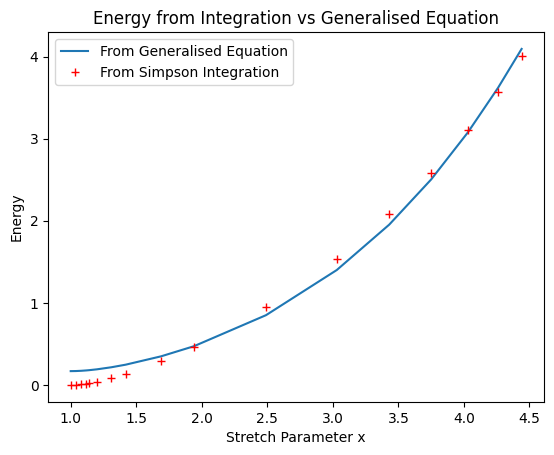

In [16]:
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Generalised Equation","From Simpson Integration"])
plt.title("Energy from Integration vs Generalised Equation")
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")

In [17]:
energy_arrudaboyce = []
for i in range(len(lamda_x)):
  energy_arrudaboyce.append(calc_energy_arrudaboyce(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_arrudaboyce = np.asarray(energy_arrudaboyce)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

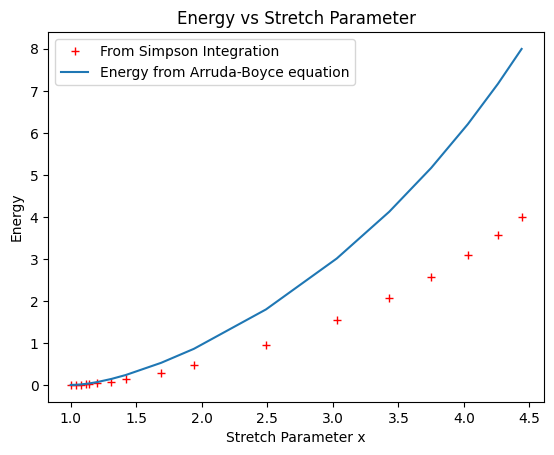

In [18]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_arrudaboyce)
plt.legend(["From Simpson Integration","Energy from Arruda-Boyce equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [19]:
energy_carroll = []
for i in range(len(lamda_x)):
  energy_carroll.append(calc_energy_carroll(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_carroll = np.asarray(energy_carroll)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

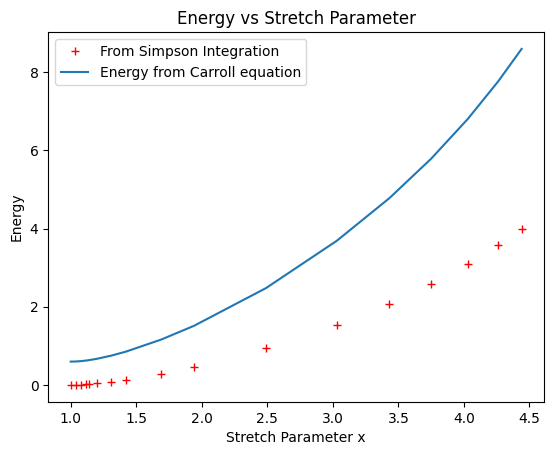

In [20]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_carroll)
plt.legend(["From Simpson Integration","Energy from Carroll equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [21]:
energy_gentthomas = []
for i in range(len(lamda_x)):
  energy_gentthomas.append(calc_energy_gentthomas(lamda_x[i],lamda_y[i],lamda_z[i]))
energy_gentthomas = np.asarray(energy_gentthomas)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

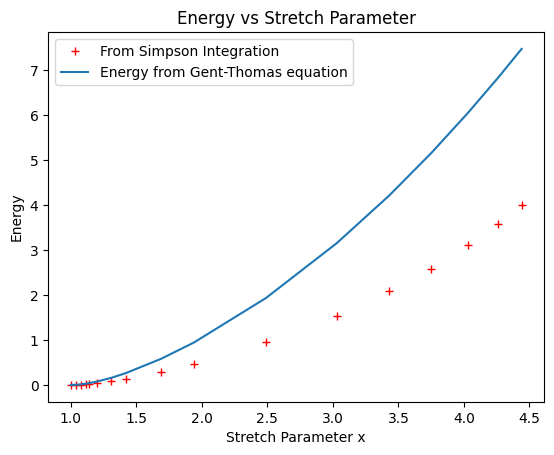

In [22]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

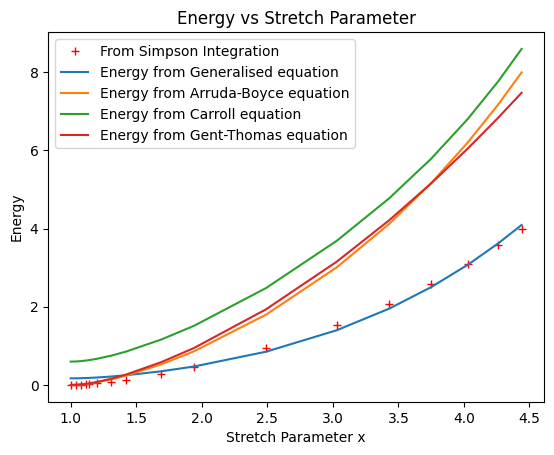

In [23]:
plt.plot(lamda_x,energy,'r+')
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy_arrudaboyce)
plt.plot(lamda_x,energy_carroll)
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Generalised equation","Energy from Arruda-Boyce equation","Energy from Carroll equation","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")